In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("C:/Users/hp/Desktop/dataset/utah-drought-data_/1895-present-monthly.csv")

In [9]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SCORE     1530 non-null   float64
 1   DATE      1530 non-null   object 
 2   D0        1530 non-null   float64
 3   D1        1530 non-null   float64
 4   D2        1530 non-null   float64
 5   D3        1530 non-null   float64
 6   D4        1530 non-null   float64
 7   NA_COUNT  1530 non-null   int64  
 8   W0        1530 non-null   float64
 9   W1        1530 non-null   float64
 10  W2        1530 non-null   float64
 11  W3        1530 non-null   float64
 12  W4        1530 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 155.5+ KB
None


In [15]:
df.set_index('date', inplace=True)

In [16]:
print(df['SCORE'].describe())

count    1530.000000
mean       36.700196
std        20.012942
min         0.000000
25%        20.800000
50%        37.750000
75%        51.800000
max        82.800000
Name: SCORE, dtype: float64


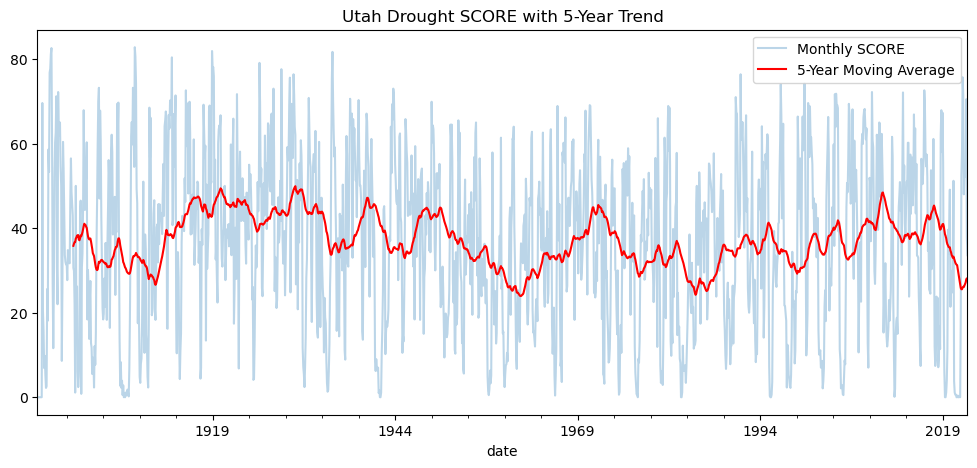

In [20]:
# 5-year moving average to see long-term trend
df['SCORE_MA60'] = df['SCORE'].rolling(60).mean()  # 60 months = 5 years

df['SCORE'].plot(alpha=0.3, figsize=(12,5), label='Monthly SCORE')
df['SCORE_MA60'].plot(color='red', label='5-Year Moving Average')
plt.title("Utah Drought SCORE with 5-Year Trend")
plt.legend()
plt.show()



In [30]:
# Select drought and wet categories
drought_df = df[['D0','D1','D2','D3','D4']]
wet_df = df[['W0','W1','W2','W3','W4']]

# Compute 12-month rolling averages
drought_trend = drought_df.rolling(12).mean()
wet_trend = wet_df.rolling(12).mean()

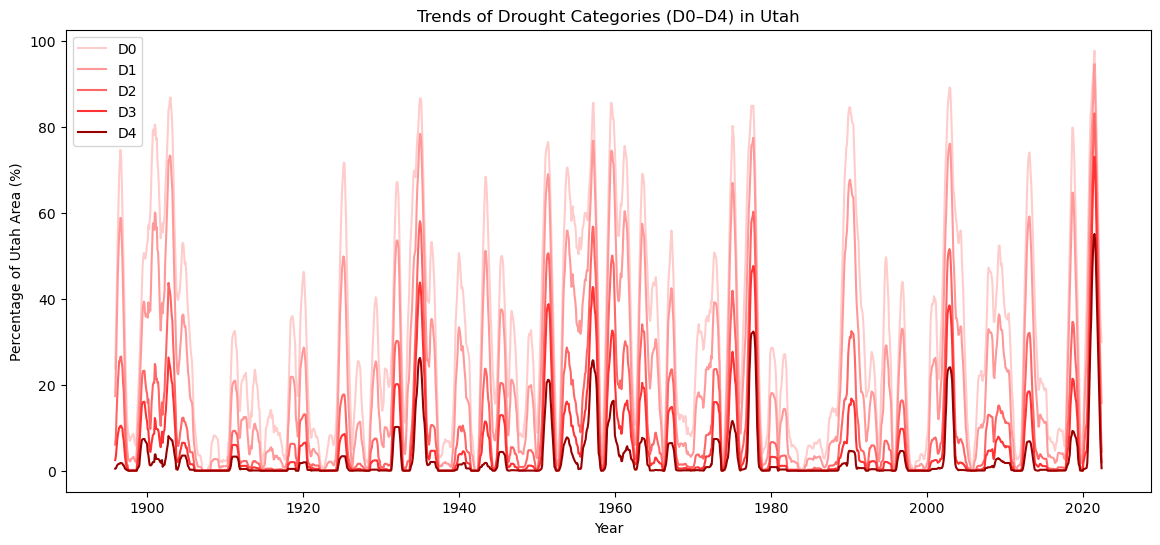

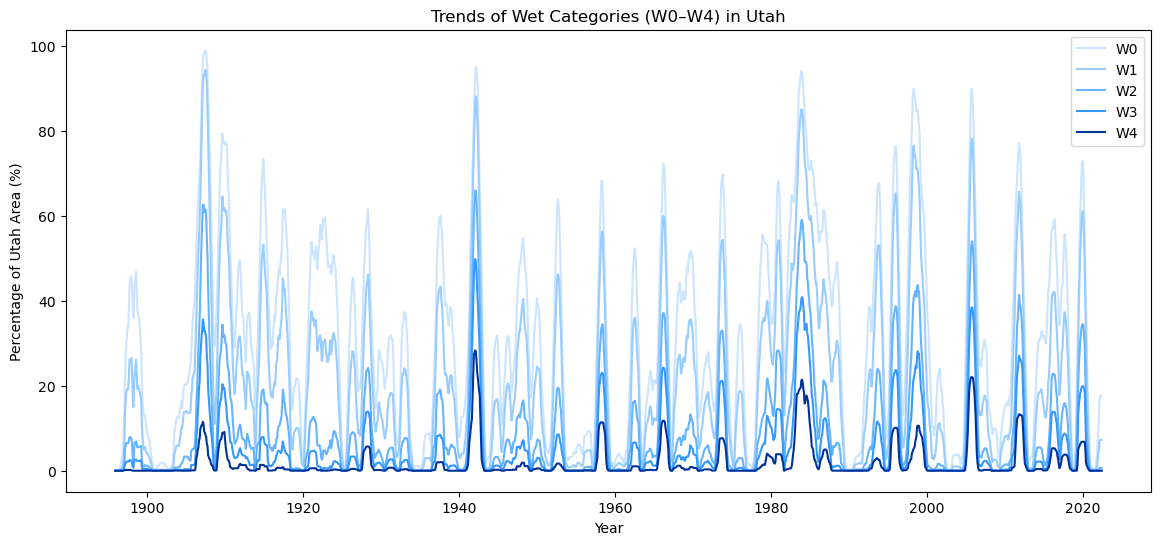

In [33]:
plt.figure(figsize=(14,6))
colors_d = ['#ffcccc','#ff9999','#ff6666','#ff3333','#990000']  # D0–D4 shades of red
for i, col in enumerate(['D0','D1','D2','D3','D4']):
    plt.plot(drought_trend.index, drought_trend[col], label=col, color=colors_d[i])

plt.title("Trends of Drought Categories (D0–D4) in Utah")
plt.xlabel("Year")
plt.ylabel("Percentage of Utah Area (%)")
plt.legend()
plt.show()
plt.figure(figsize=(14,6))
colors_w = ['#cce5ff','#99ccff','#66b3ff','#3399ff','#003399']  # W0–W4 shades of blue
for i, col in enumerate(['W0','W1','W2','W3','W4']):
    plt.plot(wet_trend.index, wet_trend[col], label=col, color=colors_w[i])

plt.title("Trends of Wet Categories (W0–W4) in Utah")
plt.xlabel("Year")
plt.ylabel("Percentage of Utah Area (%)")
plt.legend()
plt.show()


In [45]:
# Define season
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df.index.month.map(get_season)
df['month'] = df.index.month

# Features and target
features = ['D0','D1','D2','D3','D4','W0','W1','W2','W3','W4','month']
# Convert season to one-hot encoding
df = pd.get_dummies(df, columns=['Season'], drop_first=True)
features += [col for col in df.columns if col.startswith('Season_')]

target = 'SCORE'

X = df[features]
y = df[target]

print("Features prepared:", X.columns.tolist())
print("Target prepared:", target)


Features prepared: ['D0', 'D1', 'D2', 'D3', 'D4', 'W0', 'W1', 'W2', 'W3', 'W4', 'month', 'Season_Spring', 'Season_Summer', 'Season_Winter']
Target prepared: SCORE


In [46]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test, keep time order
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 1224
Test set size: 306


In [47]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
rf.fit(X_train, y_train)

print("Random Forest model trained successfully!")


Random Forest model trained successfully!


In [49]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = rf.predict(X_test)

# RMSE (manual)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


RMSE: 1.68
R²: 0.99


In [50]:
from sklearn.linear_model import LinearRegression

# Create the model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

print("Linear Regression model trained successfully!")


Linear Regression model trained successfully!


In [51]:
y_pred_lr = lr.predict(X_test)


In [52]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression R²: {r2_lr:.2f}")


Linear Regression RMSE: 3.46
Linear Regression R²: 0.97


In [53]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the model
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(X_train, y_train)

print("Gradient Boosting Regressor trained successfully!")


Gradient Boosting Regressor trained successfully!


In [54]:
y_pred_gbr = gbr.predict(X_test)


In [55]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting RMSE: {rmse_gbr:.2f}")
print(f"Gradient Boosting R²: {r2_gbr:.2f}")


Gradient Boosting RMSE: 1.67
Gradient Boosting R²: 0.99


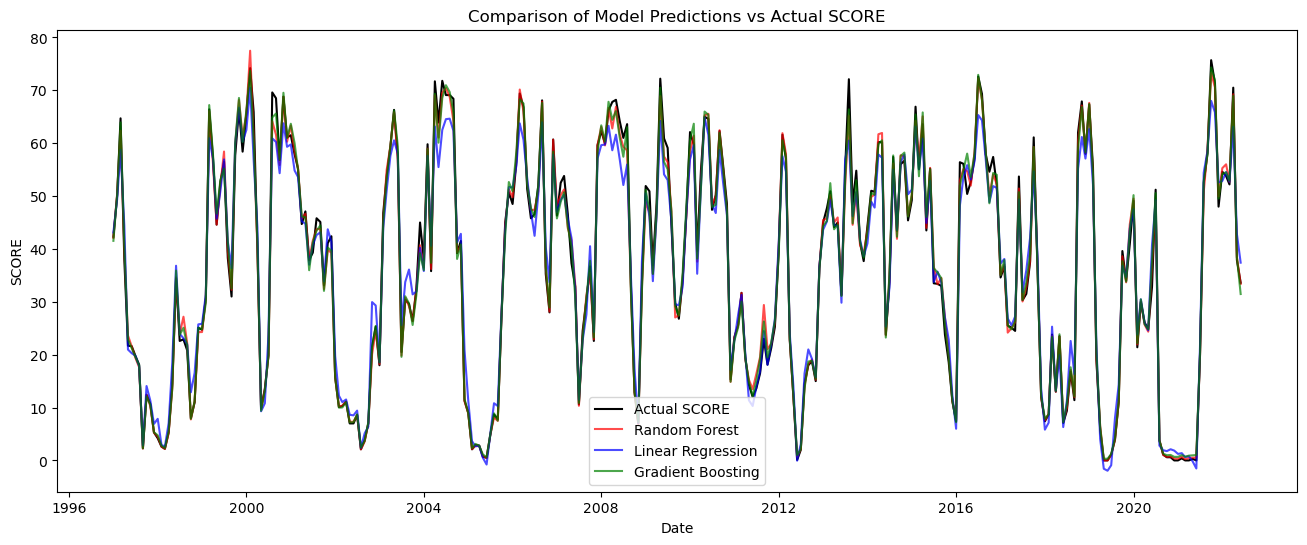

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))

# Actual SCORE
plt.plot(y_test.index, y_test, label='Actual SCORE', color='black')

# Random Forest predictions
plt.plot(y_test.index, rf.predict(X_test), label='Random Forest', color='red', alpha=0.7)

# Linear Regression predictions
plt.plot(y_test.index, lr.predict(X_test), label='Linear Regression', color='blue', alpha=0.7)

# Gradient Boosting predictions
plt.plot(y_test.index, gbr.predict(X_test), label='Gradient Boosting', color='green', alpha=0.7)

plt.title("Comparison of Model Predictions vs Actual SCORE")
plt.xlabel("Date")
plt.ylabel("SCORE")
plt.legend()
plt.show()
